In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['font.size'] = 12

In [2]:
class Gridworld:
  def __init__(self, size=6, traps=[], alpha=0):
    self.size = size
    self.traps = traps
    self.alpha = alpha
    self.start = (0, 0)
    self.goal = (size-1, size-1)

    self.states = [(x, y) for x in range(size) for y in range(size)]
    self.actions = [(-1, 0), (0, -1), (1, 0), (0, 1)]
    
    self.policy = {}
    for s in self.states:
      self.policy[(s, (-1, 0))] = 0
      self.policy[(s, (0, -1))] = 0
      self.policy[(s, (1, 0))] = 1/2
      self.policy[(s, (0, 1))] = 1/2

    self.value = {}
    for s in self.states:
      self.value[s] = 0
   
  def move(self, s, a):
    if s == self.goal:
      return [(1, 0, s)]      # Probability, Reward, Next state

    s_new = (s[0] + a[0], s[1] + a[1])

    if s_new not in self.states:
      return [(1, 0, s)]      # Probability, Reward, Next state

    if s_new in self.traps:
      # Probability, Reward, Next state
      return [(self.alpha, -1, self.start), (1-self.alpha, -1, self.goal)]

    return [(1, -1, s_new)]   # Probability, Reward, Next state

In [3]:
def show_values(world, subplot=None, title='Values'):
  if not subplot:
    fig = plt.figure(figsize=(world.size*0.8, world.size*0.8))
    subplot = fig.add_subplot(1, 1, 1)

  result = np.zeros([world.size, world.size])
  for (x, y) in world.states:
    if (x, y) in world.traps:
      result[y][x] = None
    else:
      result[y][x]  = world.value[(x, y)]
  sns.heatmap(result, square=True, cbar=False,
              annot=True, fmt='3.1f', cmap='coolwarm',
              ax=subplot).set_title(title)

In [4]:
def policy_eval(world, gamma=1, delta=0.01):
  while True:
    delta_max = 0
    for s in world.states:
      v_new = 0
      for a in world.actions:
        results = world.move(s, a)
        for p, r, s_new in results:
          v_new += world.policy[(s, a)] * p * (r + gamma * world.value[s_new])
      delta_max = max(delta_max, abs(world.value[s] - v_new))
      world.value[s] = v_new

    if delta_max < delta:
      break

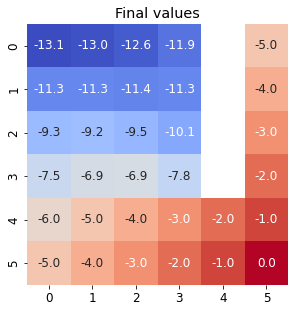

In [5]:
world = Gridworld(size=6, traps=[(4, y) for y in range(4)], alpha=0.8)
policy_eval(world)
show_values(world, title='Final values')

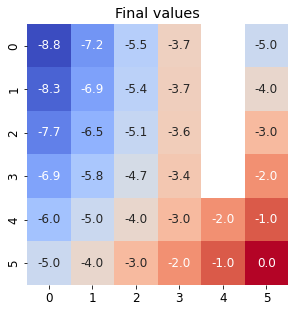

In [6]:
world = Gridworld(size=6, traps=[(4, y) for y in range(4)], alpha=0.2)
policy_eval(world)
show_values(world, title='Final values')